In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


## Read Data

In [3]:
train_df=pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv')
test_df=pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/test.csv')

In [4]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
X = train_df.drop(columns=['Activity','subject'])
y = train_df['Activity']

X_train , X_val , y_train , y_val = train_test_split(X, y,test_size = 0.2)

In [6]:
y_test = test_df['Activity']
X_test = test_df.drop(columns=['Activity','subject'])

In [7]:
label_encoder = preprocessing.LabelEncoder()

y_train_encoder =  label_encoder.fit_transform(y_train)
y_val_encoder = label_encoder.transform(y_val)
y_test_encoder = label_encoder.transform(y_test)

## Train Deep learning model

In [8]:
classes_num = len(y.unique())
input_size = len(X.columns) 

model1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size,)),
    tf.keras.layers.Dense(units = 256,activation='relu'),
    tf.keras.layers.Dense(units = 128,activation='relu'),
    tf.keras.layers.Dense(units = 64,activation='relu'),
    tf.keras.layers.Dense(units = 32,activation='relu'),
    tf.keras.layers.Dense(units = 16,activation='relu'),
    tf.keras.layers.Dense(classes_num,activation='softmax')

])


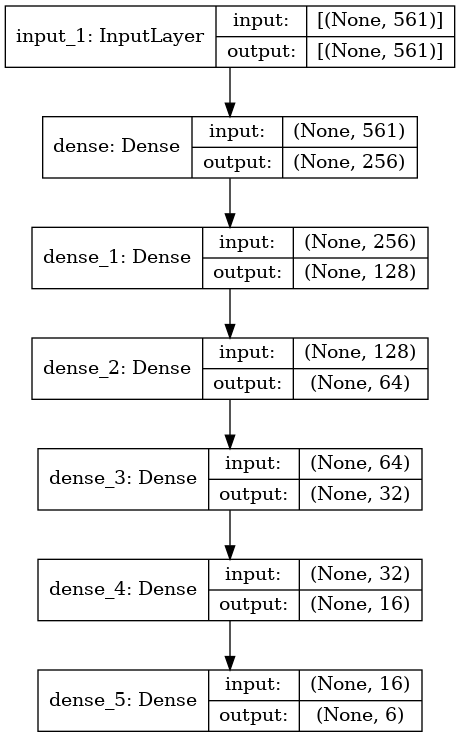

In [9]:
plot_model(model1, show_shapes=True, show_layer_names=True)

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               143872    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
Total params: 187,734
Trainable params: 187,734
Non-trainable params: 0
__________________________________________________

In [11]:
model1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [12]:
model1_history = model1.fit(
    x = X_train,y = y_train_encoder,
    validation_data =(X_val,y_val_encoder),
    epochs=20,   
)

Epoch 1/20
184/184 [==============================] - 2s 6ms/step - loss: 0.5020 - accuracy: 0.7961 - val_loss: 0.1647 - val_accuracy: 0.9395
Epoch 2/20
184/184 [==============================] - 1s 5ms/step - loss: 0.1804 - accuracy: 0.9255 - val_loss: 0.0992 - val_accuracy: 0.9613
Epoch 3/20
184/184 [==============================] - 1s 5ms/step - loss: 0.1426 - accuracy: 0.9412 - val_loss: 0.1263 - val_accuracy: 0.9531
Epoch 4/20
184/184 [==============================] - 1s 5ms/step - loss: 0.1088 - accuracy: 0.9563 - val_loss: 0.1437 - val_accuracy: 0.9606
Epoch 5/20
184/184 [==============================] - 1s 5ms/step - loss: 0.1010 - accuracy: 0.9619 - val_loss: 0.0635 - val_accuracy: 0.9782
Epoch 6/20
184/184 [==============================] - 1s 5ms/step - loss: 0.0794 - accuracy: 0.9670 - val_loss: 0.0692 - val_accuracy: 0.9728
Epoch 7/20
184/184 [==============================] - 1s 5ms/step - loss: 0.0641 - accuracy: 0.9742 - val_loss: 0.0596 - val_accuracy: 0.9769
Epoch 

In [13]:
model1.evaluate(X_test,y_test_encoder)

93/93 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9355


[0.24803626537322998, 0.9355276823043823]

In [14]:
y_perd_model1 = model1.predict(X_test)
y_perd_model1_class = []
for i in y_perd_model1:
    y_perd_model1_class.append(i.argmax())

print(classification_report(y_perd_model1_class,y_test_encoder))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       520
           1       0.89      0.93      0.91       470
           2       0.94      0.89      0.91       564
           3       1.00      0.89      0.94       557
           4       0.90      0.99      0.94       380
           5       0.91      0.94      0.92       456

    accuracy                           0.94      2947
   macro avg       0.93      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



### Another model

In [15]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size,)),
    tf.keras.layers.Dense(units = 150,activation='relu'),
    tf.keras.layers.Dense(units = 100,activation='relu'),
    tf.keras.layers.Dense(units = 50,activation='relu'),
    tf.keras.layers.Dense(units = 10,activation='relu'),
    tf.keras.layers.Dense(classes_num,activation='softmax')

])

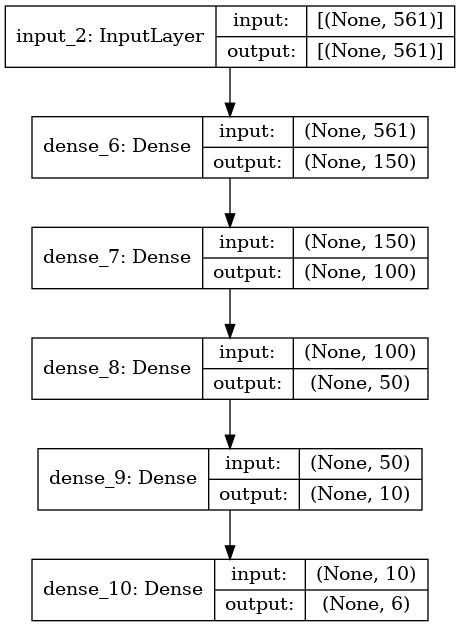

In [16]:
plot_model(model2, show_shapes=True, show_layer_names=True)

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               84300     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 66        
Total params: 105,026
Trainable params: 105,026
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [19]:
model2_history = model2.fit(
    x = X_train,y = y_train_encoder,
    validation_data =(X_val,y_val_encoder),
    epochs=30,   
)

Epoch 1/30
184/184 [==============================] - 1s 6ms/step - loss: 1.3570 - accuracy: 0.4219 - val_loss: 0.9357 - val_accuracy: 0.6458
Epoch 2/30
184/184 [==============================] - 1s 5ms/step - loss: 0.6706 - accuracy: 0.7521 - val_loss: 0.5008 - val_accuracy: 0.7634
Epoch 3/30
184/184 [==============================] - 1s 5ms/step - loss: 0.4314 - accuracy: 0.8111 - val_loss: 0.4573 - val_accuracy: 0.7478
Epoch 4/30
184/184 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8492 - val_loss: 0.3596 - val_accuracy: 0.8165
Epoch 5/30
184/184 [==============================] - 1s 4ms/step - loss: 0.2900 - accuracy: 0.8808 - val_loss: 0.2620 - val_accuracy: 0.8994
Epoch 6/30
184/184 [==============================] - 1s 5ms/step - loss: 0.2627 - accuracy: 0.8874 - val_loss: 0.2448 - val_accuracy: 0.8973
Epoch 7/30
184/184 [==============================] - 1s 4ms/step - loss: 0.2321 - accuracy: 0.9073 - val_loss: 0.2180 - val_accuracy: 0.9123
Epoch 

In [20]:
model2.evaluate(X_test,y_test_encoder)

93/93 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9192


[0.2014901340007782, 0.91923987865448]

In [21]:
y_perd_model2 = model2.predict(X_test)
y_perd_model2_class = []
for i in y_perd_model2:
    y_perd_model2_class.append(i.argmax())

print(classification_report(y_perd_model2_class,y_test_encoder))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.79      0.87       603
           2       0.76      0.97      0.85       417
           3       0.97      0.92      0.95       526
           4       0.95      0.91      0.93       443
           5       0.86      0.97      0.91       421

    accuracy                           0.92      2947
   macro avg       0.92      0.93      0.92      2947
weighted avg       0.93      0.92      0.92      2947

